For this exercise, we will use the 'Heart Disease Data Set' that was originally posted on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
file_loc = 'https://bitbucket.org/vishal_derive/vcu-data-mining/raw/1eb3c58e8c55a7d208cf2d9153f0ebef7eaa0970/data/heart.csv'

# we will use only two columns from this dataset
df = pd.read_csv(file_loc, usecols=['thalach', 'target'])

df.head()

,thalach,target
0,150,1
1,187,1
2,172,1
3,178,1
4,163,1


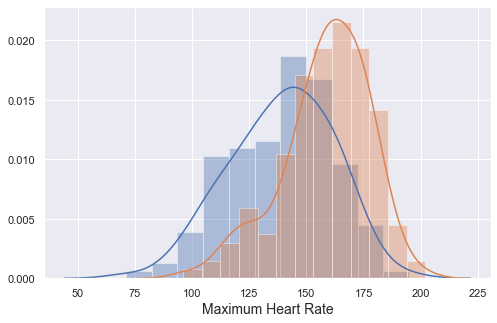

In [3]:
plt.figure(figsize=([8, 5]))

sns.distplot(df['thalach'][df['target']==0])
sns.distplot(df['thalach'][df['target']==1]);

plt.xlabel('Maximum Heart Rate', fontsize=14);

In [4]:
from sklearn.linear_model import LogisticRegression

X = np.reshape(df['thalach'].values, (len(df), 1))
y = df['target']

# Define the model object
clf = LogisticRegression(solver='lbfgs', random_state=314)

# Train (fit) the model using the training sample
clf.fit(X, y)

# Make predictions on the test sample
preds = clf.predict(X)

Text(0.5, 0, 'Maximum Heart Rate')

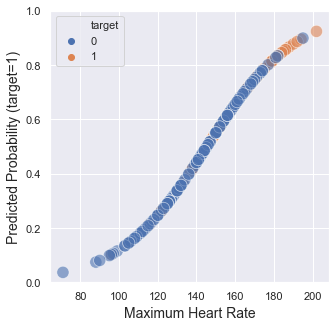

In [5]:
yhat = clf.predict_proba(X)[:, 1]

plt.figure().set_size_inches(5, 5)

sns.scatterplot(x=df['thalach'], y=yhat, hue=df['target'], s=150, alpha=.6)

plt.ylim((0, 1))
plt.ylabel('Predicted Probability (target=1)', fontsize=14)
plt.xlabel('Maximum Heart Rate', fontsize=14)

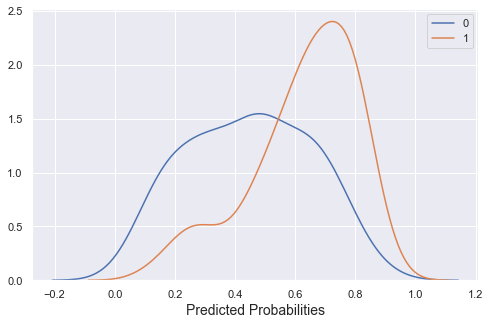

In [6]:
plt.figure(figsize=(8, 5))

sns.distplot(yhat[df['target']==0], hist=False, label='0')
sns.distplot(yhat[df['target']==1], hist=False, label='1');

plt.xlabel('Predicted Probabilities', fontsize=14);

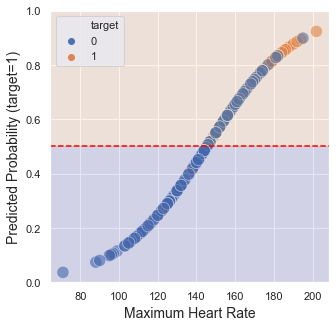

In [7]:
plt.figure(figsize=[5, 5])

sns.scatterplot(x=df['thalach'], y=yhat, hue=df['target'], s=150, alpha=.6)

plt.axhline(y=0.5, color='red', linestyle='--')
plt.axhspan(0, .5, alpha=0.1, color='darkblue')
plt.axhspan(.5, 1, alpha=0.1, color='darkorange')

plt.ylim((0, 1))
plt.ylabel('Predicted Probability (target=1)', fontsize=14)
plt.xlabel('Maximum Heart Rate', fontsize=14);

In [8]:
pred_class = [1 if p >= 0.5 else 0 for p in yhat]

confusion_matrix = pd.crosstab(y, preds)

confusion_matrix

col_0,0,1
target,,
0,83,55
1,35,130


### Accuracy

Definition from [scikit-learn.](https://scikit-learn.org/stable/modules/model_evaluation.html)

$${Accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$$

Here's the simplified version:

$$ Accuracy = \sum_{n=1}^N \frac{Correct\;Predictions}{Total\;Classes} $$

In [9]:
accuracy = (confusion_matrix.iloc[0, 0] + confusion_matrix.iloc[1, 1]) / len(y)

accuracy

0.7029702970297029

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_class, y)

0.7029702970297029

### Sensitivity

$$ Sensitivity = \sum_{n=1}^N \frac{Correct\;Positive\;Predictions}{Total\;Positive\;Classes} $$

In [11]:
sensitivity = confusion_matrix.iloc[1, 1] / sum(y)

sensitivity

0.7878787878787878

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, pred_class)

array([[ 83,  55],
       [ 35, 130]], dtype=int64)

In [13]:
confusion_matrix(y, pred_class).ravel()

array([ 83,  55,  35, 130], dtype=int64)

In [14]:
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y, pred_class).ravel()

In [15]:
true_pos / (true_pos + false_neg)

0.7878787878787878

### Specificity

$$ Specificity = \sum_{n=1}^N \frac{Correct\;Negative\;Predictions}{Total\;Negative\;Classes} $$

In [16]:
conf_matrix = pd.crosstab(y, pd.Series(pred_class, name='pred'))

specificity = conf_matrix.iloc[0, 0] / sum(y==0)

specificity

0.6014492753623188

In [17]:
true_neg / (true_neg + false_pos)

0.6014492753623188

In [18]:
def model_accuracy(cutoff):
    
    pred_class = [1 if p >= cutoff else 0 for p in yhat]

    true_neg, false_pos, false_neg, true_pos = confusion_matrix(y, pred_class).ravel()

    accuracy = (true_pos + true_neg) / len(y)

    sensitivity = true_pos / (true_pos + false_neg)

    specificity = true_neg / (true_neg + false_pos)
    
    print (f'{cutoff:.2f} [{accuracy:.2f}, {sensitivity:.2f}, {specificity:.2f}]')

In [19]:
cutoffs = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

print ('Cutoff [Accuracy, Sensitivity, Specificity]')
for cutoff in cutoffs:
    model_accuracy(cutoff)

Cutoff [Accuracy, Sensitivity, Specificity]
0.00 [0.54, 1.00, 0.00]
0.10 [0.56, 1.00, 0.03]
0.25 [0.62, 0.96, 0.22]
0.50 [0.70, 0.79, 0.60]
0.75 [0.59, 0.30, 0.93]
0.90 [0.46, 0.01, 1.00]
1.00 [0.46, 0.00, 1.00]


In [20]:
cutoffs = np.linspace(0, 1, 100)

cutoffs[:10]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

In [21]:
def model_accuracy(n):
    
    cutoffs = np.linspace(0, 1, n)
        
    accu, sens, spec = [], [], []
    
    for cutoff in cutoffs:
        
        pred_class = [1 if p >= cutoff else 0 for p in yhat]

        true_neg, false_pos, false_neg, true_pos = confusion_matrix(y, pred_class).ravel()

        accu.append((true_pos + true_neg) / len(y))

        sens.append(true_pos / (true_pos + false_neg))

        spec.append(true_neg / (true_neg + false_pos))

    return cutoffs, accu, sens, spec
                
thresholds, accuracy, sensitivity, specificity = model_accuracy(100) 

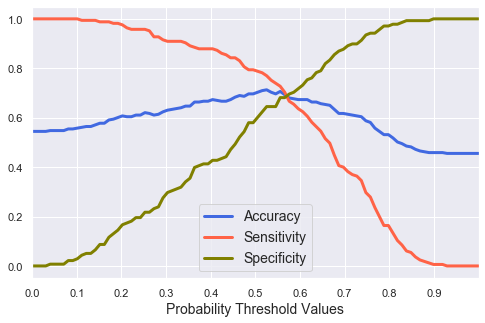

In [22]:
sns.set(style='darkgrid')

plt.figure(figsize=(8, 5))

plt.plot(thresholds, accuracy, color='royalblue', lw=3, label='Accuracy')
plt.plot(thresholds, sensitivity, color='tomato', lw=3, label='Sensitivity')
plt.plot(thresholds, specificity, color='olive', lw=3, label='Specificity')

plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel('Probability Threshold Values', fontsize = 14)
plt.legend(loc='best', fontsize = 14)
plt.show()

### Receiver Operating Characteristic (ROC) Curve

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thres = roc_curve(y, yhat)

auc = roc_auc_score(y, preds)

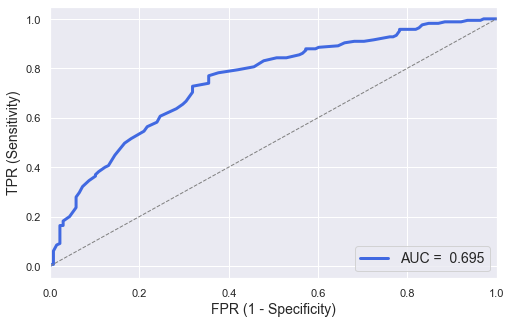

In [24]:
sns.set(style='darkgrid')

plt.figure(figsize=(8, 5))

plt.plot(fpr, tpr, color='royalblue', lw=3, label=f'AUC = {auc: 0.3f}')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])

plt.xlabel('FPR (1 - Specificity)', fontsize = 14)
plt.ylabel('TPR (Sensitivity)', fontsize = 14)
plt.legend(loc='lower right', fontsize = 14)
plt.show()